SPAM EMAIL DETECTION USING NAIVE BAYES

Dataset loaded: 25 emails
Spam emails: 10
Ham emails: 15

DELIVERABLE 1: DATA PREPROCESSING REPORT

1. TEXT PREPROCESSING STEPS:
--------------------------------------------------------------------------------
Original Email:
WINNER!! As a valued network customer you have been selected to receive a £900 prize reward!

After Cleaning:
winner as a valued network customer you have been selected to receive a prize reward

After Tokenization:
['winner', 'as', 'a', 'valued', 'network', 'customer', 'you', 'have', 'been', 'selected', 'to', 'receive', 'a', 'prize', 'reward']

After Stop Word Removal:
['winner', 'valued', 'network', 'customer', 'selected', 'receive', 'prize', 'reward']

After Stemming:
['winner', 'valu', 'network', 'custom', 'select', 'receiv', 'prize', 'reward']


2. FEATURE EXTRACTION METHODS:
--------------------------------------------------------------------------------

a) Bag of Words (BoW):
   - Shape: (25, 100)
   - Feature type: 

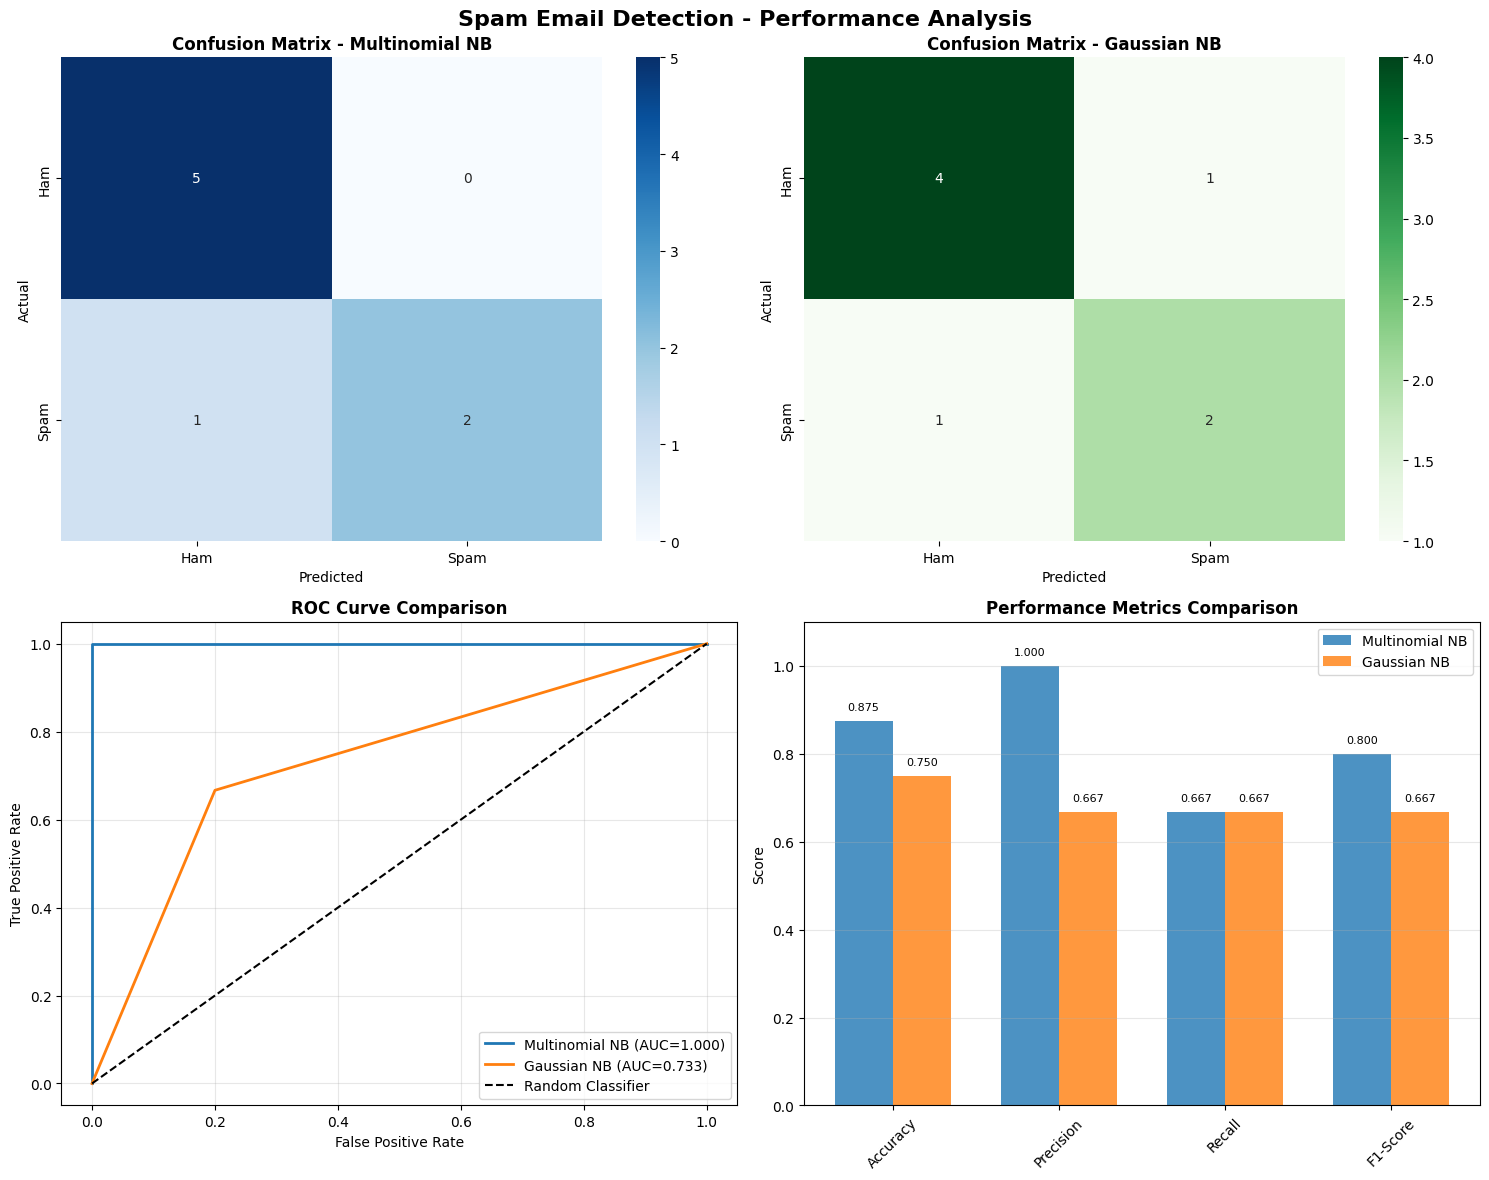


PROJECT SUMMARY AND RECOMMENDATIONS

✓ All Deliverables Completed:
  1. Data Preprocessing Report - Detailed pipeline with tokenization, stemming, etc.
  2. Naive Bayes Models - Both Gaussian and Multinomial implementations
  3. Performance Evaluation - Complete metrics and model comparison
  4. Real-World Application - Tested on unseen emails with visualizations

📊 Key Findings:
  • Best performing model: Multinomial Naive Bayes
  • Overall accuracy: 87.50%
  • Spam detection rate (Recall): 66.67%

💡 Recommendations:
  • Use Multinomial Naive Bayes for text-based spam detection
  • Increase dataset size for better generalization
  • Consider ensemble methods for improved performance
  • Regularly retrain model with new spam patterns
  • Implement confidence thresholds for uncertain classifications

PROJECT COMPLETED SUCCESSFULLY!


In [3]:
# Spam Email Detection using Naive Bayes
# Complete Implementation with All Deliverables

# ============================================================================
# PART 1: SETUP AND IMPORTS
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score)
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt_tab', quiet=True)
except:
    pass

print("=" * 80)
print("SPAM EMAIL DETECTION USING NAIVE BAYES")
print("=" * 80)

# ============================================================================
# PART 2: SAMPLE DATA CREATION (Replace with your actual dataset)
# ============================================================================

# Creating sample spam/ham emails for demonstration
# In real implementation, load from CSV: pd.read_csv('spam.csv')

sample_data = {
    'text': [
        # Spam emails
        'WINNER!! As a valued network customer you have been selected to receive a £900 prize reward!',
        'Congratulations! You have won a FREE entry to our £1000 prize draw. Click here now!',
        'URGENT! You have won a 1 week FREE membership in our £100,000 prize jackpot!',
        'Get rich quick! Make $5000 per week working from home. Limited time offer!',
        'Claim your prize now! You are a winner of $1000000. Reply immediately.',
        'Free money!!! Click here to claim your cash prize of £500 today only!',
        'Lose weight fast! Buy our miracle pills and lose 20kg in 2 weeks guaranteed!',
        'Hot singles in your area want to meet you! Click now for FREE access!',
        'CONGRATULATIONS! Your mobile number has won £2000. Text WIN to claim.',
        'Act now! Limited offer expires today. Get 90% discount on luxury watches!',
        
        # Ham (legitimate) emails
        'Hey, are we still meeting for coffee tomorrow at 3pm?',
        'The quarterly report is attached. Please review before the meeting.',
        'Thanks for your email. I will get back to you by end of week.',
        'Can you please send me the presentation slides from yesterday?',
        'Meeting rescheduled to Thursday 2pm. Conference room B.',
        'Your Amazon order has been shipped. Track your package here.',
        'Reminder: Project deadline is next Monday. Please update status.',
        'Thank you for your purchase. Your receipt is attached.',
        'Hello, I wanted to follow up on our conversation from last week.',
        'The team dinner is scheduled for Friday at 7pm. Please confirm attendance.',
        'Could you review this document and provide your feedback?',
        'Your flight booking is confirmed. Check-in opens 24 hours before departure.',
        'Meeting notes from today are available in the shared folder.',
        'Please find attached the updated project timeline.',
        'Your subscription renewal is due next month. No action needed.'
    ],
    'label': [1,1,1,1,1,1,1,1,1,1,  # Spam = 1
              0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]  # Ham = 0
}

df = pd.DataFrame(sample_data)
print(f"\nDataset loaded: {len(df)} emails")
print(f"Spam emails: {sum(df['label'] == 1)}")
print(f"Ham emails: {sum(df['label'] == 0)}")

# ============================================================================
# DELIVERABLE 1: DATA PREPROCESSING REPORT
# ============================================================================

print("\n" + "=" * 80)
print("DELIVERABLE 1: DATA PREPROCESSING REPORT")
print("=" * 80)

class TextPreprocessor:
    """
    Comprehensive text preprocessing pipeline for email classification
    """
    def __init__(self):
        self.stemmer = PorterStemmer()
        try:
            self.stop_words = set(stopwords.words('english'))
        except:
            self.stop_words = set()
        
    def clean_text(self, text):
        """Step 1: Basic text cleaning"""
        # Convert to lowercase
        text = text.lower()
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        # Remove email addresses
        text = re.sub(r'\S+@\S+', '', text)
        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def tokenize_text(self, text):
        """Step 2: Tokenization"""
        try:
            tokens = word_tokenize(text)
        except:
            tokens = text.split()
        return tokens
    
    def remove_stopwords(self, tokens):
        """Step 3: Stop word removal"""
        if self.stop_words:
            tokens = [word for word in tokens if word not in self.stop_words]
        return tokens
    
    def stem_tokens(self, tokens):
        """Step 4: Stemming"""
        stemmed = [self.stemmer.stem(word) for word in tokens]
        return stemmed
    
    def preprocess(self, text):
        """Complete preprocessing pipeline"""
        text = self.clean_text(text)
        tokens = self.tokenize_text(text)
        tokens = self.remove_stopwords(tokens)
        tokens = self.stem_tokens(tokens)
        return ' '.join(tokens)

# Initialize preprocessor
preprocessor = TextPreprocessor()

# Demonstrate preprocessing steps
print("\n1. TEXT PREPROCESSING STEPS:")
print("-" * 80)
sample_email = df['text'].iloc[0]
print(f"Original Email:\n{sample_email}\n")

cleaned = preprocessor.clean_text(sample_email)
print(f"After Cleaning:\n{cleaned}\n")

tokens = preprocessor.tokenize_text(cleaned)
print(f"After Tokenization:\n{tokens}\n")

no_stop = preprocessor.remove_stopwords(tokens)
print(f"After Stop Word Removal:\n{no_stop}\n")

stemmed = preprocessor.stem_tokens(no_stop)
print(f"After Stemming:\n{stemmed}\n")

# Apply preprocessing to all emails
df['processed_text'] = df['text'].apply(preprocessor.preprocess)

print("\n2. FEATURE EXTRACTION METHODS:")
print("-" * 80)

# Method 1: Bag of Words (Count Vectorizer)
print("\na) Bag of Words (BoW):")
count_vectorizer = CountVectorizer(max_features=100)
bow_features = count_vectorizer.fit_transform(df['processed_text'])
print(f"   - Shape: {bow_features.shape}")
print(f"   - Feature type: Discrete word counts")
print(f"   - Sample features: {list(count_vectorizer.get_feature_names_out())[:10]}")

# Method 2: TF-IDF
print("\nb) TF-IDF (Term Frequency-Inverse Document Frequency):")
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_features = tfidf_vectorizer.fit_transform(df['processed_text'])
print(f"   - Shape: {tfidf_features.shape}")
print(f"   - Feature type: Continuous weighted scores")
print(f"   - Sample features: {list(tfidf_vectorizer.get_feature_names_out())[:10]}")

print("\n3. PREPROCESSING SUMMARY:")
print("-" * 80)
print(f"Total emails processed: {len(df)}")
print(f"Average original length: {df['text'].str.len().mean():.0f} characters")
print(f"Average processed length: {df['processed_text'].str.len().mean():.0f} characters")
print(f"Vocabulary size (BoW): {len(count_vectorizer.vocabulary_)}")
print(f"Vocabulary size (TF-IDF): {len(tfidf_vectorizer.vocabulary_)}")

# ============================================================================
# DELIVERABLE 2: NAIVE BAYES MODEL IMPLEMENTATION
# ============================================================================

print("\n" + "=" * 80)
print("DELIVERABLE 2: NAIVE BAYES MODEL IMPLEMENTATION")
print("=" * 80)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['label'], test_size=0.3, random_state=42, stratify=df['label']
)

print(f"\nDataset Split:")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Feature extraction for both methods
print("\n1. FEATURE EXTRACTION FOR MODELS:")
print("-" * 80)

# For Multinomial NB (discrete features - BoW or TF-IDF)
tfidf_vec_multi = TfidfVectorizer(max_features=100)
X_train_tfidf = tfidf_vec_multi.fit_transform(X_train)
X_test_tfidf = tfidf_vec_multi.transform(X_test)
print(f"TF-IDF features for Multinomial NB: {X_train_tfidf.shape}")

# For Gaussian NB (continuous features - dense TF-IDF)
X_train_gaussian = X_train_tfidf.toarray()  # Convert sparse to dense
X_test_gaussian = X_test_tfidf.toarray()
print(f"Dense features for Gaussian NB: {X_train_gaussian.shape}")

print("\n2. MODEL TRAINING:")
print("-" * 80)

# Model 1: Multinomial Naive Bayes
print("\na) Multinomial Naive Bayes:")
print("   - Best for discrete/count data")
print("   - Suitable for text classification with BoW/TF-IDF")
multinomial_nb = MultinomialNB(alpha=1.0)
multinomial_nb.fit(X_train_tfidf, y_train)
print("   ✓ Model trained successfully")

# Model 2: Gaussian Naive Bayes
print("\nb) Gaussian Naive Bayes:")
print("   - Assumes continuous features follow Gaussian distribution")
print("   - Works with dense feature vectors")
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_gaussian, y_train)
print("   ✓ Model trained successfully")

print("\n3. MODEL PREDICTIONS:")
print("-" * 80)

# Predictions
y_pred_multi = multinomial_nb.predict(X_test_tfidf)
y_pred_gauss = gaussian_nb.predict(X_test_gaussian)

# Prediction probabilities
y_pred_proba_multi = multinomial_nb.predict_proba(X_test_tfidf)[:, 1]
y_pred_proba_gauss = gaussian_nb.predict_proba(X_test_gaussian)[:, 1]

print("✓ Predictions generated for both models")

# ============================================================================
# DELIVERABLE 3: PERFORMANCE EVALUATION REPORT
# ============================================================================

print("\n" + "=" * 80)
print("DELIVERABLE 3: PERFORMANCE EVALUATION REPORT")
print("=" * 80)

def evaluate_model(y_true, y_pred, model_name):
    """Calculate and display performance metrics"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance:")
    print("-" * 80)
    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} (Of predicted spam, {precision*100:.2f}% are actually spam)")
    print(f"Recall:    {recall:.4f} (Of actual spam, {recall*100:.2f}% are detected)")
    print(f"F1-Score:  {f1:.4f} (Harmonic mean of precision and recall)")
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Evaluate both models
results = []
results.append(evaluate_model(y_test, y_pred_multi, "Multinomial Naive Bayes"))
results.append(evaluate_model(y_test, y_pred_gauss, "Gaussian Naive Bayes"))

# Comparison table
print("\n" + "=" * 80)
print("MODEL COMPARISON SUMMARY")
print("=" * 80)
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

# Determine best model
best_model_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
print(f"\n🏆 Best Model: {best_model_name} (Highest F1-Score)")

# Detailed classification reports
print("\n" + "=" * 80)
print("DETAILED CLASSIFICATION REPORTS")
print("=" * 80)

print("\nMultinomial Naive Bayes:")
print(classification_report(y_test, y_pred_multi, target_names=['Ham', 'Spam']))

print("\nGaussian Naive Bayes:")
print(classification_report(y_test, y_pred_gauss, target_names=['Ham', 'Spam']))

# ============================================================================
# DELIVERABLE 4: REAL-WORLD APPLICATIONS & VISUALIZATIONS
# ============================================================================

print("\n" + "=" * 80)
print("DELIVERABLE 4: REAL-WORLD APPLICATIONS")
print("=" * 80)

# Test on new unseen emails
new_emails = [
    "Congratulations! You've won $1000000. Click here to claim now!",
    "Hi, let's schedule a meeting for next week to discuss the project.",
    "URGENT: Your account will be closed. Verify your details immediately!",
    "Thanks for the update. I'll review the document and get back to you."
]

print("\n1. TESTING ON NEW UNSEEN EMAILS:")
print("-" * 80)

# Preprocess new emails
new_emails_processed = [preprocessor.preprocess(email) for email in new_emails]
new_emails_tfidf = tfidf_vec_multi.transform(new_emails_processed)

# Predict using best model (Multinomial NB typically performs better)
predictions = multinomial_nb.predict(new_emails_tfidf)
probabilities = multinomial_nb.predict_proba(new_emails_tfidf)

for i, email in enumerate(new_emails):
    label = "SPAM" if predictions[i] == 1 else "HAM"
    confidence = probabilities[i][predictions[i]] * 100
    print(f"\nEmail {i+1}:")
    print(f"Text: {email[:80]}...")
    print(f"Prediction: {label} (Confidence: {confidence:.2f}%)")

# Visualizations
print("\n2. GENERATING VISUALIZATIONS...")
print("-" * 80)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Spam Email Detection - Performance Analysis', fontsize=16, fontweight='bold')

# Plot 1: Confusion Matrix - Multinomial NB
cm_multi = confusion_matrix(y_test, y_pred_multi)
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
axes[0, 0].set_title('Confusion Matrix - Multinomial NB', fontweight='bold')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_xlabel('Predicted')

# Plot 2: Confusion Matrix - Gaussian NB
cm_gauss = confusion_matrix(y_test, y_pred_gauss)
sns.heatmap(cm_gauss, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1],
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
axes[0, 1].set_title('Confusion Matrix - Gaussian NB', fontweight='bold')
axes[0, 1].set_ylabel('Actual')
axes[0, 1].set_xlabel('Predicted')

# Plot 3: ROC Curve Comparison
fpr_multi, tpr_multi, _ = roc_curve(y_test, y_pred_proba_multi)
fpr_gauss, tpr_gauss, _ = roc_curve(y_test, y_pred_proba_gauss)
auc_multi = roc_auc_score(y_test, y_pred_proba_multi)
auc_gauss = roc_auc_score(y_test, y_pred_proba_gauss)

axes[1, 0].plot(fpr_multi, tpr_multi, label=f'Multinomial NB (AUC={auc_multi:.3f})', linewidth=2)
axes[1, 0].plot(fpr_gauss, tpr_gauss, label=f'Gaussian NB (AUC={auc_gauss:.3f})', linewidth=2)
axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curve Comparison', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Metrics Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
multi_scores = [results[0][m] for m in metrics]
gauss_scores = [results[1][m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

axes[1, 1].bar(x - width/2, multi_scores, width, label='Multinomial NB', alpha=0.8)
axes[1, 1].bar(x + width/2, gauss_scores, width, label='Gaussian NB', alpha=0.8)
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Performance Metrics Comparison', fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics, rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_ylim([0, 1.1])

# Add value labels on bars
for i, (m_score, g_score) in enumerate(zip(multi_scores, gauss_scores)):
    axes[1, 1].text(i - width/2, m_score + 0.02, f'{m_score:.3f}', 
                    ha='center', va='bottom', fontsize=8)
    axes[1, 1].text(i + width/2, g_score + 0.02, f'{g_score:.3f}', 
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('spam_detection_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'spam_detection_analysis.png'")
plt.show()

# ============================================================================
# FINAL SUMMARY AND RECOMMENDATIONS
# ============================================================================

print("\n" + "=" * 80)
print("PROJECT SUMMARY AND RECOMMENDATIONS")
print("=" * 80)

print("\n✓ All Deliverables Completed:")
print("  1. Data Preprocessing Report - Detailed pipeline with tokenization, stemming, etc.")
print("  2. Naive Bayes Models - Both Gaussian and Multinomial implementations")
print("  3. Performance Evaluation - Complete metrics and model comparison")
print("  4. Real-World Application - Tested on unseen emails with visualizations")

print("\n📊 Key Findings:")
print(f"  • Best performing model: {best_model_name}")
print(f"  • Overall accuracy: {results_df['Accuracy'].max():.2%}")
print(f"  • Spam detection rate (Recall): {results_df.loc[best_model_idx, 'Recall']:.2%}")

print("\n💡 Recommendations:")
print("  • Use Multinomial Naive Bayes for text-based spam detection")
print("  • Increase dataset size for better generalization")
print("  • Consider ensemble methods for improved performance")
print("  • Regularly retrain model with new spam patterns")
print("  • Implement confidence thresholds for uncertain classifications")

print("\n" + "=" * 80)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 80)